## 1. 기초 모델 구축

1-1. MNIST 데이터셋 불러오기

In [1]:
from tensorflow.keras.datasets import mnist

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 정규화 (0~1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


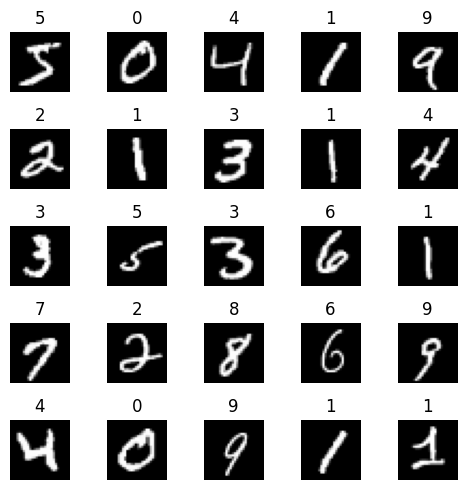

In [2]:
import matplotlib.pyplot as plt

# 샘플 시각화
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

1-2. 간단한 CNN 분류 모델 설계 및 학습

In [3]:
from tensorflow.keras import layers, models

# CNN 분류 모델 정의
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 요약도
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=5, # epoch : 전체 데이터를 1회 학습하는 횟수
    batch_size=64, # 한 번에 64개 샘플씩 나눠서 학습
    validation_split=0.2, # 학습 데이터의 20%를 validation set으로 사용
    verbose=1
)

# 학습 완료 후 모델 저장
save_path = "/content/drive/MyDrive/mnist_cnn_tf.keras"
model.save(save_path)

Mounted at /content/drive
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8468 - loss: 0.4741 - val_accuracy: 0.9825 - val_loss: 0.0605
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9719 - loss: 0.0964 - val_accuracy: 0.9829 - val_loss: 0.0603
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9783 - loss: 0.0691 - val_accuracy: 0.9857 - val_loss: 0.0508
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9835 - loss: 0.0550 - val_accuracy: 0.9888 - val_loss: 0.0400
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9856 - loss: 0.0439 - val_accuracy: 0.9887 - val_loss: 0.0404


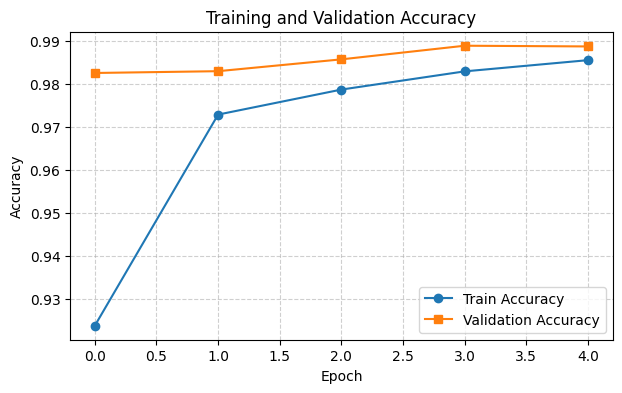

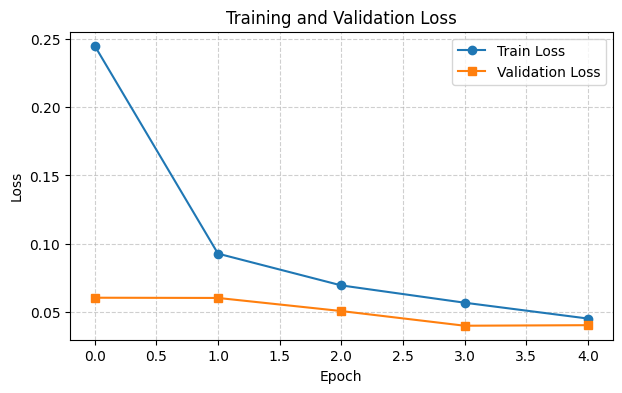

In [5]:
import matplotlib.pyplot as plt

# 정확도(Accuracy) 그래프
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 's-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 손실(Loss) 그래프
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], 'o-', label='Train Loss')
plt.plot(history.history['val_loss'], 's-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


1-3. 정상 데이터 정확도 측정

In [6]:
# 테스트셋 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"\n정상 데이터 정확도: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9871 - loss: 0.0346

정상 데이터 정확도: 99.05%


## 2. 적대적 공격 실험

2-1. FGSM 공격 구현

In [7]:
import tensorflow as tf
import numpy as np

# 적대적 공격 loss 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

# FGSM 공격 함수
def fgsm(model, images, labels, epsilon):
    images = tf.convert_to_tensor(images)
    labels = tf.convert_to_tensor(labels) # 텐서로 변환
    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images, training=False)
        loss = loss_object(labels, preds) # 입력값을 받았을 때 모델의 loss
    grad = tape.gradient(loss, images)
    signed_grad = tf.sign(grad) # loss가 증가하는 gradient의 방향
    adv = images + epsilon * signed_grad # 원본 이미지에 적대적 교란 삽입
    adv = tf.clip_by_value(adv, 0.0, 1.0)
    return adv

# 배치 별 FGSM 공격 적용 및 정확도 계산 함수
def eval_fgsm(model, x, y, epsilon, batch_size=1024):
    loss, clean_acc = model.evaluate(x, y, batch_size=batch_size, verbose=0)

    adv_preds = []
    n = x.shape[0]
    for i in range(0, n, batch_size):
        xb = x[i:i+batch_size]
        yb = y[i:i+batch_size]
        adv = fgsm(model, xb, yb, tf.constant(epsilon, dtype=tf.float32))
        preds = model.predict(adv, verbose=0)
        adv_preds.append(np.argmax(preds, axis=1))
    adv_preds = np.concatenate(adv_preds, axis=0)
    adv_acc = (adv_preds == y).mean()
    return float(clean_acc), float(adv_acc)

2-2. 공격된 이미지 시각화

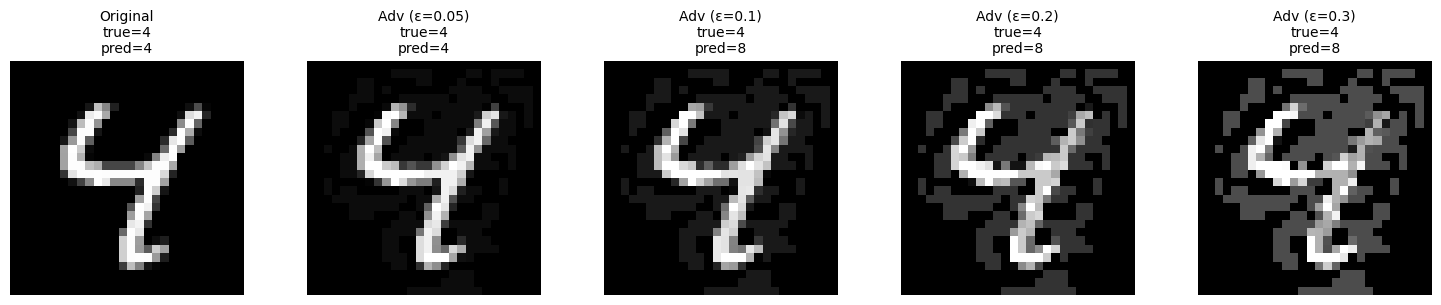

In [8]:
import numpy as np
import matplotlib.pyplot as plt

idx = 6
# 여러 eps 값 (적대적 교란의 크기)
epsilons = [0.05, 0.1, 0.2, 0.3]

# 저장된 모델 불러오기
model = tf.keras.models.load_model("/content/drive/MyDrive/mnist_cnn_tf.keras")

# 원본 데이터
orig = x_test[idx:idx+1]
true_label = int(y_test[idx])

# 원본 예측
pred_orig = int(np.argmax(model.predict(orig, verbose=0), axis=1)[0])

# 적대적 예제 생성 및 예측
advs = []
preds_adv = []
for eps in epsilons:
    adv = fgsm(model, orig, np.array([true_label]), tf.constant(eps, dtype=tf.float32)).numpy()
    advs.append(adv)
    preds_adv.append(int(np.argmax(model.predict(adv, verbose=0), axis=1)[0]))

# 시각화
n_cols = len(epsilons) + 1
plt.figure(figsize=(3*n_cols, 3))

for i in range(n_cols):
    ax = plt.subplot(1, n_cols, i+1)
    if i == 0:
        img = orig[0] if orig.ndim == 4 else orig
        title = f"Original\ntrue={true_label}\npred={pred_orig}"
    else:
        adv = advs[i-1]
        img = adv[0] if adv.ndim == 4 else adv
        title = f"Adv (ε={epsilons[i-1]})\ntrue={true_label}\npred={preds_adv[i-1]}"
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(title, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


2-3. 정확도 변화 그래프

Clean test accuracy: 99.05%

Running FGSM with epsilon=0.05 ...
  Clean Acc: 99.05%  |  Adv Acc: 96.74%
Running FGSM with epsilon=0.1 ...
  Clean Acc: 99.05%  |  Adv Acc: 91.02%
Running FGSM with epsilon=0.2 ...
  Clean Acc: 99.05%  |  Adv Acc: 61.05%
Running FGSM with epsilon=0.3 ...
  Clean Acc: 99.05%  |  Adv Acc: 27.27%


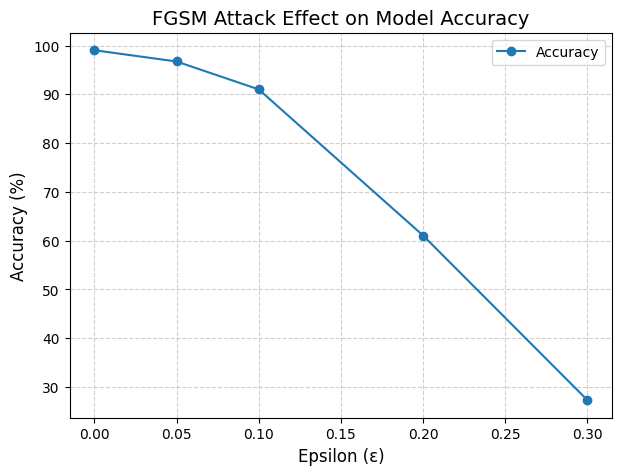

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 epsilons에 대해 평가
epsilons = [0.0, 0.05, 0.1, 0.2, 0.3]
results = []

for eps in epsilons:
    if eps == 0:
        loss, acc = model.evaluate(x_test, y_test, verbose=0)
        print(f"Clean test accuracy: {acc*100:.2f}%\n")
        adv_a = acc
        results.append({"epsilon": eps, "clean_acc": acc, "adv_acc": adv_a})
    else:
        print(f"Running FGSM with epsilon={eps} ...")
        clean_a, adv_a = eval_fgsm(model, x_test, y_test, epsilon=eps, batch_size=1024)
        print(f"  Clean Acc: {clean_a*100:.2f}%  |  Adv Acc: {adv_a*100:.2f}%")
        results.append({"epsilon": eps, "clean_acc": clean_a, "adv_acc": adv_a})

# 그래프 시각화
df = pd.DataFrame(results)
plt.figure(figsize=(7,5))
plt.plot(df["epsilon"], df["adv_acc"]*100, marker='o', label="Accuracy")

plt.title("FGSM Attack Effect on Model Accuracy", fontsize=14)
plt.xlabel("Epsilon (ε)", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


-> 적대적 교란의 크기(eps)가 증가할수록 이미지 품질은 떨어지지만 공격 성능은 향상되는 trade-off 관계를 확인할 수 있다.

## 3. 적대적 공격 방어

3-1-1. 입력 전처리 적용 (Gaussian Blurring)

In [10]:
epsilon = 0.2
batch_size = 1024
adv_batches = []

# 적대적 예제 생성
for i in range(0, len(x_test), batch_size):
    xb = x_test[i:i+batch_size]
    yb = y_test[i:i+batch_size]
    adv = fgsm(model, xb, yb, tf.constant(epsilon, dtype=tf.float32)).numpy()
    adv_batches.append(adv)

adv_all = np.concatenate(adv_batches, axis=0)

σ=0.00 → Clean Accuracy: 99.05%, Adv Accuracy: 61.05%
σ=0.25 → Clean Accuracy: 99.06%, Adv Accuracy: 61.06%
σ=0.50 → Clean Accuracy: 98.98%, Adv Accuracy: 65.79%
σ=0.75 → Clean Accuracy: 98.76%, Adv Accuracy: 72.14%
σ=1.00 → Clean Accuracy: 98.35%, Adv Accuracy: 74.95%
σ=1.25 → Clean Accuracy: 97.37%, Adv Accuracy: 75.63%
σ=1.50 → Clean Accuracy: 95.29%, Adv Accuracy: 73.58%
σ=1.75 → Clean Accuracy: 91.11%, Adv Accuracy: 68.13%
σ=2.00 → Clean Accuracy: 83.23%, Adv Accuracy: 60.06%


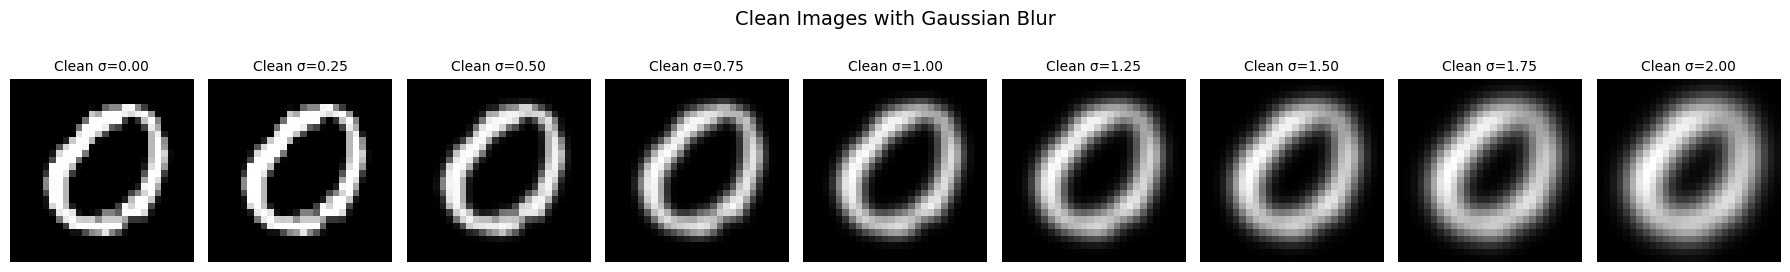

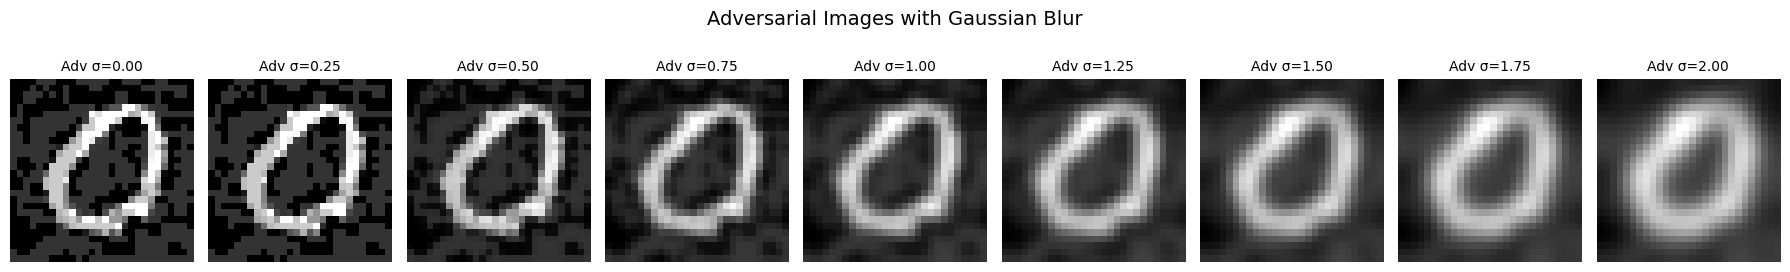

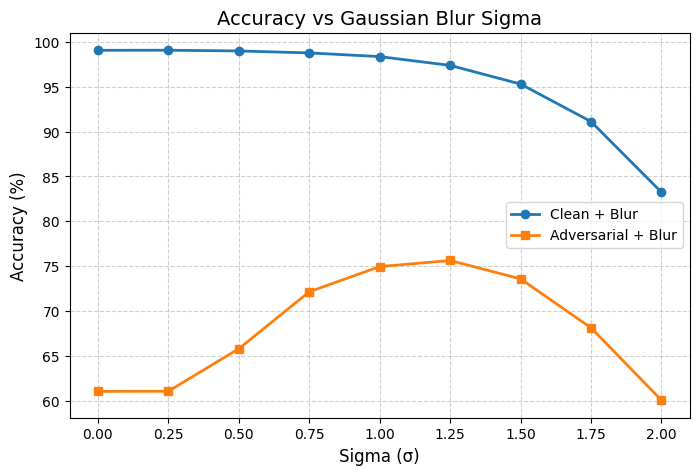

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

sigma_list = [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0] # gaussian blurring 강도
accs_adv = []
accs_clean = []

# 각 sigma별 정확도 계산
for s in sigma_list:
    # 적대적 예제에 blur 적용
    if s == 0:
        adv_blur = adv_all
    else:
        adv_blur = np.empty_like(adv_all)
        for i in range(len(adv_all)):
            adv_blur[i] = gaussian_filter(adv_all[i], sigma=s)
    preds_adv = np.argmax(model.predict(adv_blur, verbose=0), axis=1)
    acc_adv = (preds_adv == y_test).mean()
    accs_adv.append(acc_adv)

    # 원본 테스트 이미지(x_test)에 blur 적용
    if s == 0:
        clean_blur = x_test
    else:
        clean_blur = np.empty_like(x_test)
        for i in range(len(x_test)):
            clean_blur[i] = gaussian_filter(x_test[i], sigma=s)
    preds_clean = np.argmax(model.predict(clean_blur, verbose=0), axis=1)
    acc_clean = (preds_clean == y_test).mean()
    accs_clean.append(acc_clean)

    print(f"σ={s:.2f} → Clean Accuracy: {acc_clean*100:.2f}%, Adv Accuracy: {acc_adv*100:.2f}%")

# 시각화
idx = np.random.randint(len(x_test))
clean = x_test[idx]
adv = adv_all[idx]

# 기존 테스트 데이터
plt.figure(figsize=(18, 3))
for i, s in enumerate(sigma_list):
    plt.subplot(1, len(sigma_list), i+1)
    blur = gaussian_filter(clean, sigma=s)
    plt.imshow(blur.squeeze(), cmap='gray')
    plt.title(f"Clean σ={s:.2f}", fontsize=10)
    plt.axis('off')
plt.suptitle("Clean Images with Gaussian Blur", fontsize=14)
plt.tight_layout()
plt.show()

# 적대적 예제
plt.figure(figsize=(18, 3))
for i, s in enumerate(sigma_list):
    plt.subplot(1, len(sigma_list), i+1)
    blur = gaussian_filter(adv, sigma=s)
    plt.imshow(blur.squeeze(), cmap='gray')
    plt.title(f"Adv σ={s:.2f}", fontsize=10)
    plt.axis('off')
plt.suptitle("Adversarial Images with Gaussian Blur", fontsize=14)
plt.tight_layout()
plt.show()

# 정확도 변화 그래프 (Clean vs Adv)
plt.figure(figsize=(8,5))
plt.plot(sigma_list, np.array(accs_clean)*100, marker='o', linewidth=2, label='Clean + Blur')
plt.plot(sigma_list, np.array(accs_adv)*100, marker='s', linewidth=2, label='Adversarial + Blur')
plt.title("Accuracy vs Gaussian Blur Sigma", fontsize=14)
plt.xlabel("Sigma (σ)", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


-> 입력 전처리 기반의 방어 기법은 적대적 예제에 대한 방어 효과를 보이지만, 동시에 기존 모델의 일반 성능을 저하시킬 수 있다.

3-1-2. Adversarial training

In [12]:
from tensorflow.keras.datasets import mnist

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 정규화 (0~1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [13]:
import numpy as np
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

eps = 0.2          # FGSM 강도
batch_size = 1024  # 한 번에 FGSM 생성할 크기
num_adv_keep = 6000  # 훈련에 사용할 adversarial 샘플 개수

# 적대적 예제 생성
x_adv_batches = []
surrogate_model = tf.keras.models.load_model("/content/drive/MyDrive/mnist_cnn_tf.keras")
for i in range(0, len(x_train), batch_size):
    xb = x_train[i:i+batch_size]
    yb = y_train[i:i+batch_size]
    adv_b = fgsm(surrogate_model, xb, yb, tf.constant(eps, dtype=tf.float32)).numpy()
    x_adv_batches.append(adv_b)

x_adv_full = np.concatenate(x_adv_batches, axis=0)
y_adv_full = y_train.copy()

# 랜덤으로 6,000개 선택
rng = np.random.default_rng(42)
sel_idx = rng.choice(len(x_adv_full), size=num_adv_keep, replace=False)
x_adv = x_adv_full[sel_idx]
y_adv = y_adv_full[sel_idx]

# 기존 train 데이터 + 적대적 예제 6,000개
x_train_new = np.concatenate([x_train, x_adv], axis=0)
y_train_new = np.concatenate([y_train, y_adv], axis=0)

# 섞기
perm = rng.permutation(len(x_train_new))
x_train_new = x_train_new[perm]
y_train_new = y_train_new[perm]

print(f"기존 학습 데이터 개수: {len(x_train)}")
print(f"적대적 예제 개수: {len(x_adv)}")
print(f"최종 adversarial training에 사용된 학습 데이터 개수: {len(x_train_new)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
기존 학습 데이터 개수: 60000
적대적 예제 개수: 6000
최종 adversarial training에 사용된 학습 데이터 개수: 66000


In [14]:
from tensorflow.keras import layers, models

# 모델 정의
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

# 모델 학습
history = model.fit(
    x_train_new, y_train_new,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# 학습 완료 후 모델 저장
save_path = "/content/drive/MyDrive/mnist_adv.keras"
model.save(save_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8534 - loss: 0.4684 - val_accuracy: 0.9736 - val_loss: 0.0835
Epoch 2/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9641 - loss: 0.1163 - val_accuracy: 0.9795 - val_loss: 0.0635
Epoch 3/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9748 - loss: 0.0829 - val_accuracy: 0.9835 - val_loss: 0.0531
Epoch 4/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9804 - loss: 0.0637 - val_accuracy: 0.9861 - val_loss: 0.0433
Epoch 5/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9851 - loss: 0.0484 - val_accuracy: 0.9847 - val_loss: 0.0528


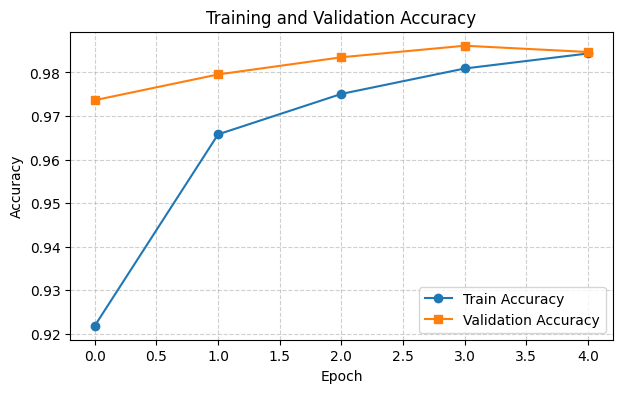

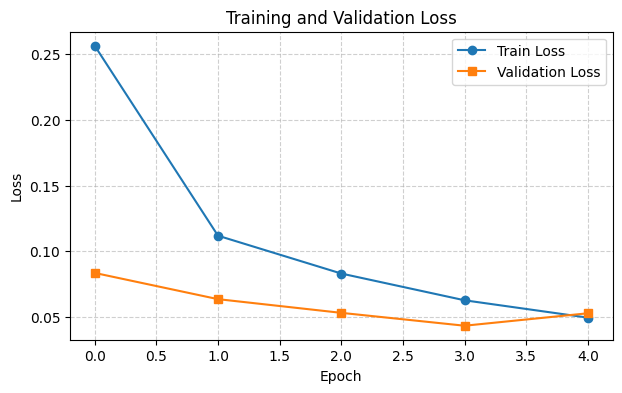

In [16]:
import matplotlib.pyplot as plt

# 정확도(Accuracy) 그래프
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 's-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 손실(Loss) 그래프
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], 'o-', label='Train Loss')
plt.plot(history.history['val_loss'], 's-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Baseline 모델 - 기존 테스트 데이터 성능: 99.05%
Adv Training 모델 - 기존 테스트 데이터 성능:    98.76%
Baseline 모델 - 적대적 예제 성능: 61.05%
Adv Training 모델 - 적대적 예제 성능: 95.93%


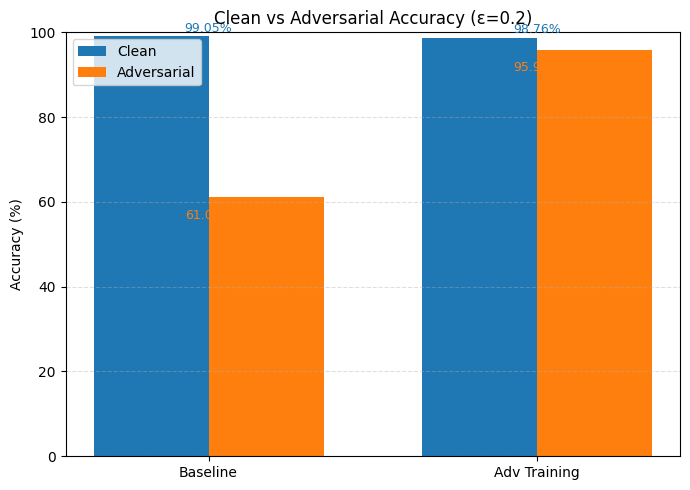

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

eps = 0.2
batch_size = 1024

# 기존 테스트 데이터에 대한 성능
preds_sur_clean = np.argmax(surrogate_model.predict(x_test, batch_size=batch_size, verbose=0), axis=1)
acc_sur_clean = (preds_sur_clean == y_test).mean()

preds_vic_clean = np.argmax(model.predict(x_test, batch_size=batch_size, verbose=0), axis=1)
acc_vic_clean = (preds_vic_clean == y_test).mean()

print(f"Baseline 모델 - 기존 테스트 데이터 성능: {acc_sur_clean*100:.2f}%")
print(f"Adv Training 모델 - 기존 테스트 데이터 성능:    {acc_vic_clean*100:.2f}%")

print(f"==============")

# 적대적 예제 생성
adv_batches = []
for i in range(0, len(x_test), batch_size):
    xb = x_test[i:i+batch_size]
    yb = y_test[i:i+batch_size]
    adv_b = fgsm(surrogate_model, xb, yb, tf.constant(eps, dtype=tf.float32)).numpy()
    adv_batches.append(adv_b)
adv_all = np.concatenate(adv_batches, axis=0)

# 적대적 예제에 대한 성능
preds_sur_adv = np.argmax(surrogate_model.predict(adv_all, batch_size=batch_size, verbose=0), axis=1)
acc_sur_adv = (preds_sur_adv == y_test).mean()

preds_vic_adv = np.argmax(model.predict(adv_all, batch_size=batch_size, verbose=0), axis=1)
acc_vic_adv = (preds_vic_adv == y_test).mean()

print(f"Baseline 모델 - 적대적 예제 성능: {acc_sur_adv*100:.2f}%")
print(f"Adv Training 모델 - 적대적 예제 성능: {acc_vic_adv*100:.2f}%")

# 시각화
models = ['Baseline', 'Adv Training']
clean_accs = [acc_sur_clean*100, acc_vic_clean*100]
adv_accs = [acc_sur_adv*100, acc_vic_adv*100]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, clean_accs, width, color='tab:blue', label='Clean')
plt.bar(x + width/2, adv_accs, width, color='tab:orange', label='Adversarial')

plt.xticks(x, models)
plt.ylabel('Accuracy (%)')
plt.title(f'Clean vs Adversarial Accuracy (ε={eps})')
plt.ylim(0, 100)
for i, v in enumerate(clean_accs):
    plt.text(i, v + 1.0, f"{v:.2f}%", ha='center', fontsize=9, color='tab:blue')
for i, v in enumerate(adv_accs):
    plt.text(i, v - 5.0, f"{v:.2f}%", ha='center', fontsize=9, color='tab:orange')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


| 방어 방법                    | 연산 비용 | 방어 효과 | 기존 성능 변화                       | 주요 특징                      |
| ------------------------ | ----- | ----- | ---------------------------------- | -------------------------- |
| **Gaussian Blurring(σ=1.50)**    | 낮음    | 낮음(61.05% -> 73.58%)    | 약간의 저하(99.05% -> 95.29%)                         | 구현이 단순하고 빠름 |
| **Adversarial Training** | 높음    | 높음(61.05% -> 95.93%)    | 미미한 저하(99.05% -> 98.76%) | 적대적 강인성이 높으나 추가 학습이 필요     |

## 4. 확장 아이디어

4-1. PGD 공격 구현

In [18]:
# 적대적 공격 loss 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

# FGSM 공격 함수
def fgsm(model, images, labels, epsilon):
    images = tf.convert_to_tensor(images)
    labels = tf.convert_to_tensor(labels) # 텐서로 변환
    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images, training=False)
        loss = loss_object(labels, preds) # 입력값을 받았을 때 모델의 loss
    grad = tape.gradient(loss, images)
    signed_grad = tf.sign(grad) # loss가 증가하는 gradient의 방향
    adv = images + epsilon * signed_grad # 원본 이미지에 적대적 교란 삽입
    adv = tf.clip_by_value(adv, 0.0, 1.0)
    return adv

def pgd(model, images, labels, epsilon, alpha, steps=10):
    images = tf.convert_to_tensor(images)
    labels = tf.convert_to_tensor(labels)
    adv = images + tf.random.uniform(tf.shape(images), -epsilon, epsilon) # 초반에 랜덤한 교란을 삽입
    adv = tf.clip_by_value(adv, 0.0, 1.0)

    for _ in range(steps): # 반복적으로 gradient 계산 후 적대적 교란 삽입
        with tf.GradientTape() as tape:
            tape.watch(adv)
            preds = model(adv, training=False)
            loss = loss_object(labels, preds)
        grad = tape.gradient(loss, adv)
        adv = adv + alpha * tf.sign(grad)
        adv = tf.clip_by_value(adv, images - epsilon, images + epsilon)
        adv = tf.clip_by_value(adv, 0.0, 1.0)
    return adv

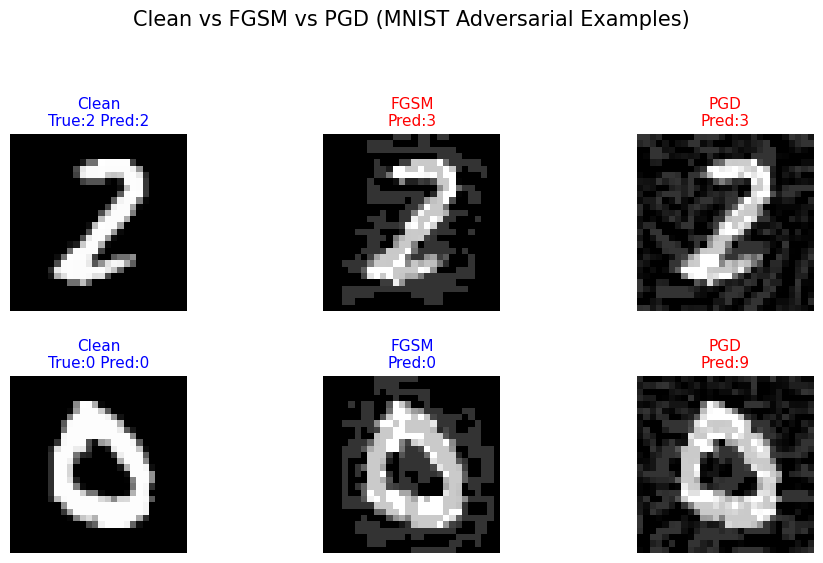

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/MyDrive/mnist_cnn_tf.keras")

n_show = 2
eps = 0.2 # 총 적대적 교란의 크기
pgd_steps = 10 # PGD 반복 횟수
alpha = eps / pgd_steps # 한 번의 step 당 삽입하는 교란의 크기

# 무작위 샘플 선택
idxs = np.random.choice(len(x_test), size=n_show, replace=False)
x_sel = x_test[idxs]
y_sel = y_test[idxs]

# FGSM / PGD 생성
x_fgsm = fgsm(model, x_sel, y_sel, eps).numpy()
x_pgd = pgd(model, x_sel, y_sel, eps, alpha, steps=pgd_steps).numpy()

# 모델 예측
p_clean = np.argmax(model.predict(x_sel, verbose=0), axis=1)
p_fgsm = np.argmax(model.predict(x_fgsm, verbose=0), axis=1)
p_pgd = np.argmax(model.predict(x_pgd, verbose=0), axis=1)

# 시각화
plt.figure(figsize=(10, n_show * 2.8))

for i in range(n_show):
    # Clean
    plt.subplot(n_show, 3, 3*i + 1)
    plt.imshow(x_sel[i].squeeze(), cmap='gray')
    color = "blue" if p_clean[i] == y_sel[i] else "red"
    plt.title(f"Clean\nTrue:{y_sel[i]} Pred:{p_clean[i]}", color=color, fontsize=11)
    plt.axis('off')

    # FGSM
    plt.subplot(n_show, 3, 3*i + 2)
    plt.imshow(x_fgsm[i].squeeze(), cmap='gray')
    color = "blue" if p_fgsm[i] == y_sel[i] else "red"
    plt.title(f"FGSM\nPred:{p_fgsm[i]}", color=color, fontsize=11)
    plt.axis('off')

    # PGD
    plt.subplot(n_show, 3, 3*i + 3)
    plt.imshow(x_pgd[i].squeeze(), cmap='gray')
    color = "blue" if p_pgd[i] == y_sel[i] else "red"
    plt.title(f"PGD\nPred:{p_pgd[i]}", color=color, fontsize=11)
    plt.axis('off')

plt.suptitle("Clean vs FGSM vs PGD (MNIST Adversarial Examples)", fontsize=15, y=1.02)
plt.tight_layout(pad=2)
plt.show()


FGSM generation time: 0.05 s
PGD generation time: 0.38 s
Clean Accuracy: 99.05%
FGSM  Accuracy: 61.05%
PGD   Accuracy: 7.28%


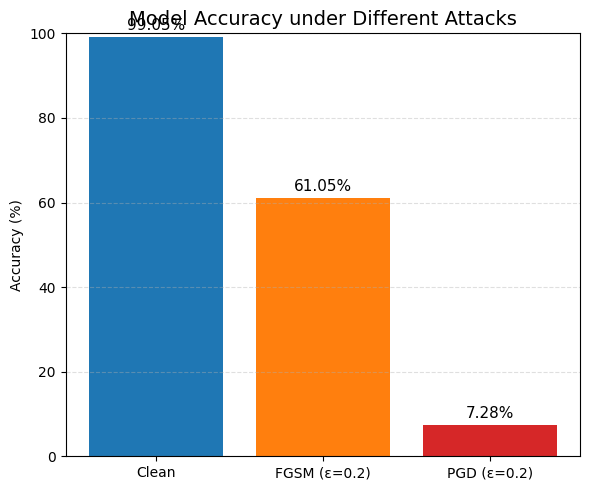

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time

eps = 0.2
pgd_steps = 10
alpha = eps / pgd_steps
batch_size = 1024

# 적대적 예제 생성
# FGSM
x_fgsm = []
x_pgd = []
for i in range(0, len(x_test), batch_size):
    xb = x_test[i:i+batch_size]
    yb = y_test[i:i+batch_size]
    t0 = time.perf_counter()
    x_fgsm.append(fgsm(model, xb, yb, eps).numpy())
x_fgsm = np.concatenate(x_fgsm, axis=0)
t1 = time.perf_counter()
print(f"FGSM generation time: {t1 - t0:.2f} s")

# PGD
for i in range(0, len(x_test), batch_size):
    xb = x_test[i:i+batch_size]
    yb = y_test[i:i+batch_size]
    t0 = time.perf_counter()
    x_pgd.append(pgd(model, xb, yb, eps, alpha, steps=pgd_steps).numpy())
x_pgd = np.concatenate(x_pgd, axis=0)
t1 = time.perf_counter()
print(f"PGD generation time: {t1 - t0:.2f} s")

print(f"====================================")

# 모델 평가
clean_acc = model.evaluate(x_test, y_test, verbose=0)[1]
fgsm_acc  = model.evaluate(x_fgsm, y_test, verbose=0)[1]
pgd_acc   = model.evaluate(x_pgd, y_test, verbose=0)[1]

print(f"Clean Accuracy: {clean_acc*100:.2f}%")
print(f"FGSM  Accuracy: {fgsm_acc*100:.2f}%")
print(f"PGD   Accuracy: {pgd_acc*100:.2f}%")


# 시각화
accs = np.array([clean_acc, fgsm_acc, pgd_acc]) * 100
labels = ['Clean', f'FGSM (ε={eps})', f'PGD (ε={eps})']

plt.figure(figsize=(6,5))
bars = plt.bar(labels, accs, color=['tab:blue','tab:orange','tab:red'])
plt.title("Model Accuracy under Different Attacks", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar, acc in zip(bars, accs):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 1, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

| 공격 방법 | 연산 비용 | 공격 효과 | 주요 특징 |
|------------|------------|------------|------------|
| **FGSM** | 낮음 | 낮음 | 한 번의 그래디언트 계산으로 교란 생성, 속도가 매우 빠름 |
| **PGD** | 높음 | 높음 | 여러 번 반복하여 교란 삽입, 랜덤 시작(Random Start) 사용 |
